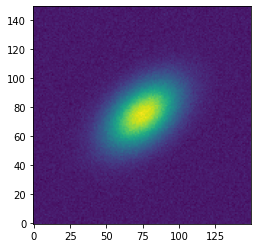

In [4]:
import numpy as np
from astropy.modeling.models import Gaussian2D
from photutils.datasets import make_noise_image

g = Gaussian2D(100.0, 75, 75, 20, 12, theta=40.0 * np.pi / 180.0)
ny = nx = 150
y, x = np.mgrid[0:ny, 0:nx]
noise = make_noise_image((ny, nx), distribution='gaussian', mean=0.0,
                         stddev=2.0, seed=1234)
data = g(x, y) + noise
plt.imshow(data, origin='lower')

In [2]:
from photutils.isophote import EllipseGeometry
geometry = EllipseGeometry(x0=75, y0=75, sma=20, eps=0.5,
                           pa=20.0 * np.pi / 180.0)

(<matplotlib.patches.Ellipse at 0x7f3d1fad0510>,)

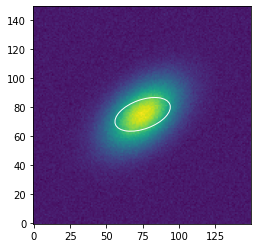

In [3]:
import matplotlib.pyplot as plt
from photutils.aperture import EllipticalAperture
aper = EllipticalAperture((geometry.x0, geometry.y0), geometry.sma,
                          geometry.sma * (1 - geometry.eps),
                          geometry.pa)
plt.imshow(data, origin='lower')
aper.plot(color='white')

In [5]:
from photutils.isophote import Ellipse
ellipse = Ellipse(data, geometry)

In [6]:
isolist = ellipse.fit_image()

In [7]:
print(isolist.pa)  

[0.00000000e+00 2.58535753e-02 1.24256562e-02 2.81721978e-03
 3.10563967e+00 3.01432320e+00 2.91208710e+00 2.55360440e+00
 3.27651020e-01 3.12989889e+00 3.12989889e+00 1.60083458e-02
 3.13128138e+00 8.21342904e-02 1.03607167e-01 2.71149038e-01
 3.24063461e-01 3.80343330e-01 4.56602744e-01 7.06300856e-01
 1.14601327e+00 1.00547610e+00 9.73052498e-01 6.24088483e-01
 5.79963692e-01 6.24163415e-01 7.36384625e-01 7.64785086e-01
 6.98341066e-01 6.77667082e-01 6.81952965e-01 6.27394048e-01
 6.64901780e-01 6.91061635e-01 6.96059959e-01 6.93651822e-01
 6.86072215e-01 6.78834010e-01 6.91164291e-01 7.06300856e-01
 6.87382954e-01 6.78429447e-01 6.91862445e-01 6.88541139e-01
 6.89746528e-01 7.04616952e-01 6.98198657e-01 7.02949642e-01
 6.87174405e-01 6.87174405e-01 6.87174405e-01 7.36770374e-01
 7.36770374e-01 7.36770374e-01]


In [8]:
print(isolist.to_table())  

       sma                intens            intens_err      ... niter stop_code
                                                            ...                
------------------ ------------------- -------------------- ... ----- ---------
               0.0   103.3660740915662                  0.0 ...     0         0
0.5346972612827552  101.85768904687318 0.030160083578275224 ...    10         0
0.5881669874110307  101.68151143067347  0.02830961834110205 ...    10         0
0.6469836861521338  101.50567066820417  0.02586692962814825 ...    11         0
0.7116820547673471  101.37211014998985  0.03225404223638819 ...    10         0
0.7828502602440819  101.18631258412665  0.03615817009817679 ...    10         0
0.8611352862684901  100.96909938363925   0.0325876433007939 ...    10         0
0.9472488148953392  100.78896952184998  0.04976635835544789 ...    10         0
1.0419736963848731  100.42647235445655  0.08086877251869284 ...    19         0
1.1461710660233606  100.28134046008117  

Text(0, 0.5, 'y0')

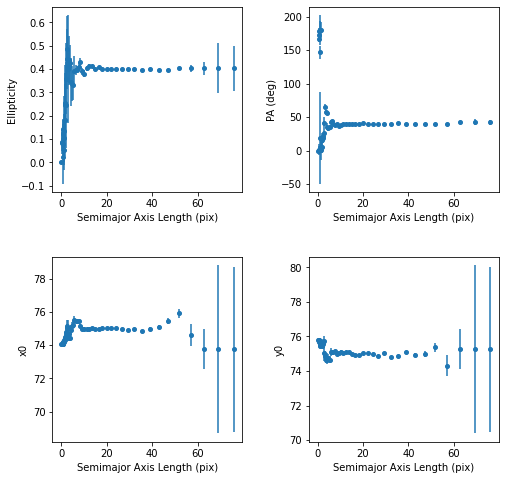

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.modeling.models import Gaussian2D
from photutils.datasets import make_noise_image
from photutils.isophote import Ellipse, EllipseGeometry

g = Gaussian2D(100.0, 75, 75, 20, 12, theta=40.0 * np.pi / 180.0)
ny = nx = 150
y, x = np.mgrid[0:ny, 0:nx]
noise = make_noise_image((ny, nx), distribution='gaussian', mean=0.0,
                         stddev=2.0, seed=1234)
data = g(x, y) + noise
geometry = EllipseGeometry(x0=75, y0=75, sma=20, eps=0.5,
                           pa=20.0 * np.pi / 180.0)
ellipse = Ellipse(data, geometry)
isolist = ellipse.fit_image()

plt.figure(figsize=(8, 8))
plt.subplots_adjust(hspace=0.35, wspace=0.35)

plt.subplot(2, 2, 1)
plt.errorbar(isolist.sma, isolist.eps, yerr=isolist.ellip_err,
             fmt='o', markersize=4)
plt.xlabel('Semimajor Axis Length (pix)')
plt.ylabel('Ellipticity')

plt.subplot(2, 2, 2)
plt.errorbar(isolist.sma, isolist.pa / np.pi * 180.0,
             yerr=isolist.pa_err / np.pi * 80.0, fmt='o', markersize=4)
plt.xlabel('Semimajor Axis Length (pix)')
plt.ylabel('PA (deg)')

plt.subplot(2, 2, 3)
plt.errorbar(isolist.sma, isolist.x0, yerr=isolist.x0_err, fmt='o',
             markersize=4)
plt.xlabel('Semimajor Axis Length (pix)')
plt.ylabel('x0')

plt.subplot(2, 2, 4)
plt.errorbar(isolist.sma, isolist.y0, yerr=isolist.y0_err, fmt='o',
             markersize=4)
plt.xlabel('Semimajor Axis Length (pix)')
plt.ylabel('y0')

In [10]:
from photutils.isophote import build_ellipse_model
model_image = build_ellipse_model(data.shape, isolist)
residual = data - model_image

Text(0.5, 1.0, 'Residual')

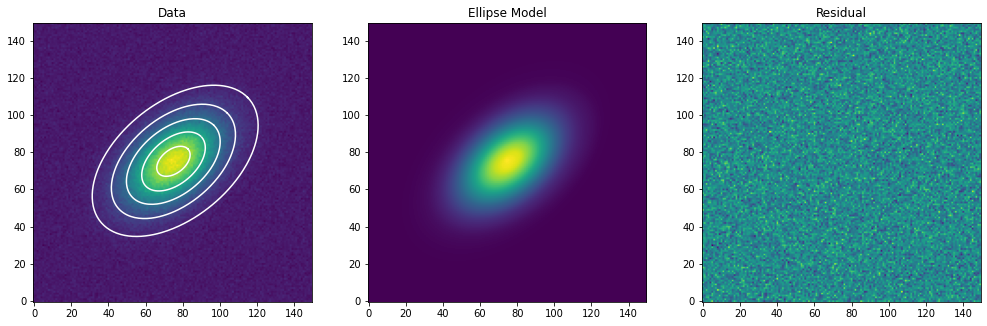

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.modeling.models import Gaussian2D
from photutils.datasets import make_noise_image
from photutils.isophote import (Ellipse, EllipseGeometry,
                                build_ellipse_model)

g = Gaussian2D(100.0, 75, 75, 20, 12, theta=40.0 * np.pi / 180.0)
ny = nx = 150
y, x = np.mgrid[0:ny, 0:nx]
noise = make_noise_image((ny, nx), distribution='gaussian', mean=0.0,
                         stddev=2.0, seed=1234)
data = g(x, y) + noise
geometry = EllipseGeometry(x0=75, y0=75, sma=20, eps=0.5,
                           pa=20.0 * np.pi / 180.0)
ellipse = Ellipse(data, geometry)
isolist = ellipse.fit_image()

model_image = build_ellipse_model(data.shape, isolist)
residual = data - model_image

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 5), nrows=1, ncols=3)
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.02, top=0.98)
ax1.imshow(data, origin='lower')
ax1.set_title('Data')

smas = np.linspace(10, 50, 5)
for sma in smas:
    iso = isolist.get_closest(sma)
    x, y, = iso.sampled_coordinates()
    ax1.plot(x, y, color='white')

ax2.imshow(model_image, origin='lower')
ax2.set_title('Ellipse Model')

ax3.imshow(residual, origin='lower')
ax3.set_title('Residual')